In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [39]:
data = pd.read_csv("Monthly_product_sales_Report.csv")
data2 = pd.read_csv("final_Cleaned_Data_for_ModelTraining.csv")

In [40]:
data.head()

,Unnamed: 0,Store Code,Sale Month,Brand Code,Category,Quantity Sold,Total Product Sale,max Sale in Week(Year)
0,0,1,5,1,1,5,360.01,21
1,1,1,5,2,6,3,349.00,21
2,2,1,5,3,1,6,504.00,22
3,3,1,5,6,1,1,92.00,22
4,4,1,5,7,5,3,223.99,22


In [41]:
data2.head()

,Unnamed: 0,Store Code,Brand Code,Category,Sale Week,Sale Month,MRP,Discount in %,Sales Qty,Total Sales Amount
0,0,5,17,6,38,9,29.33,0.0,1,29.33
1,1,5,17,6,39,9,33.33,0.0,1,33.33
2,2,5,36,2,39,9,54.27,0.0,1,54.27
3,3,5,16,3,32,8,9.60,0.0,1,9.60
4,4,5,20,5,2,1,26.67,0.0,1,26.67


In [42]:
data = data.drop("Unnamed: 0", axis = 1)
data2 = data2.drop("Unnamed: 0", axis = 1)

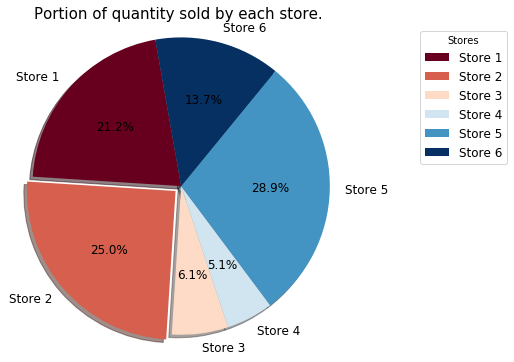

In [43]:
#Ploting percentage sales by each store.
data["Store Codes"] = ["Store " + str(i) for i in data["Store Code"]]
f, ax = plt.subplots(figsize=(6, 6))
explode = (0, 0.05, 0, 0, 0, 0)
sale_count = data.groupby("Store Codes")["Total Product Sale"].sum().plot(kind='pie',startangle=100, explode= explode, shadow=True, colormap="RdBu", autopct='%1.1f%%', fontsize=12, legend = True, label = "")
_ = ax.axis('equal')
__ = ax.set_title("Portion of quantity sold by each store.", fontsize=15)
___ = ax.legend(title="Stores", loc="best", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)


#plt.setp(autotexts, size=8, weight="bold")



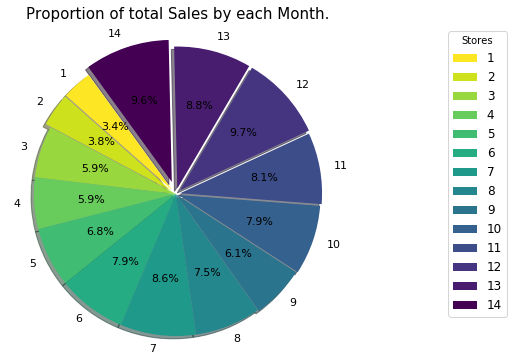

In [44]:


#Monthly Sales proportion of each months.

monthly_sum = data.groupby("Sale Month")["Total Product Sale"].sum()
monthly_sum = monthly_sum.sort_index().to_dict()
#monthly_data = {calendar.month_abbr[i]:v for i,v in monthly_sum.items()}
#data = data.sort_values("Sale Month")
f, ax = plt.subplots(figsize=(6, 6))
explode = [.04,.04, 0 ,0, 0, 0, 0, 0,0.01, 0.02,.03, .04, .04, .09]
'''sale_count = pd.Series(monthly_data).plot(kind='pie',startangle=126, explode= explode, shadow=True, colormap="viridis_r", autopct='%1.1f%%', fontsize=11, legend = True, label = "")
_ = ax.axis('equal')
__ = ax.set_title("Proportion of total Sales by each Month.", fontsize=15)
___ = ax.legend(title="Stores", loc="best", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)'''


sale_count = pd.Series(monthly_sum).plot(kind='pie',startangle=126, explode= explode, shadow=True, colormap="viridis_r", autopct='%1.1f%%', fontsize=11, legend = True, label = "")
_ = ax.axis('equal')
__ = ax.set_title("Proportion of total Sales by each Month.", fontsize=15)
___ = ax.legend(title="Stores", loc="best", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)



Text(0.5, 0, 'Average Product Sale')

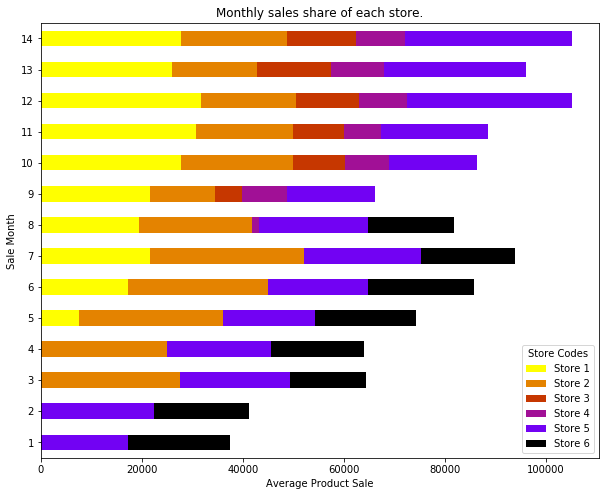

In [45]:
ax = data.groupby(["Sale Month","Store Codes"])["Total Product Sale"].sum().unstack('Store Codes').plot(kind='barh',title ="Monthly sales share of each store.", stacked=True, colormap="gnuplot_r",figsize=(10, 8))
ax.set_xlabel("Average Product Sale")


Text(0, 0.5, 'Total Sales Amount')

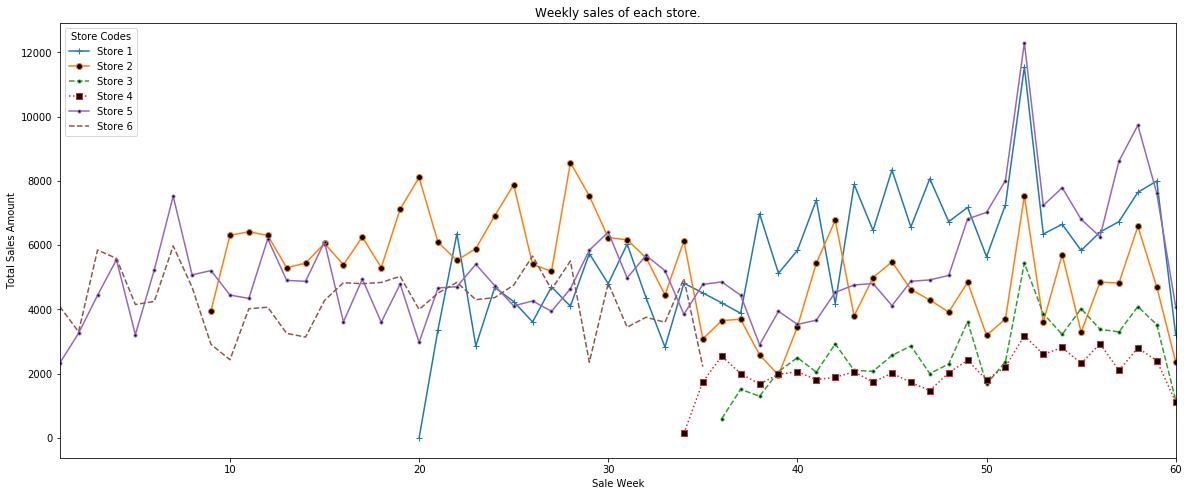

In [46]:
data2["Store Codes"] = ["Store " + str(i) for i in data2["Store Code"]]
barp = data2.groupby(["Sale Week","Store Codes"])["Total Sales Amount"].sum().unstack('Store Codes').plot(kind='line', title ="Weekly sales of each store.",figsize=(20, 8), style=['+-','o-','.--','s:', '.-', '--'],markerfacecolor='black')
barp.set_ylabel("Total Sales Amount")
